In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Membuat transfer function H(s) = 4 / (3s^2 + 2s + 1)
num = [4]
den = [3, 2, 1]
H = ctrl.TransferFunction(num, den)

print("Transfer Function H(s) =")
print(H)

Transfer Function H(s) =
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         4
  ---------------
  3 s^2 + 2 s + 1


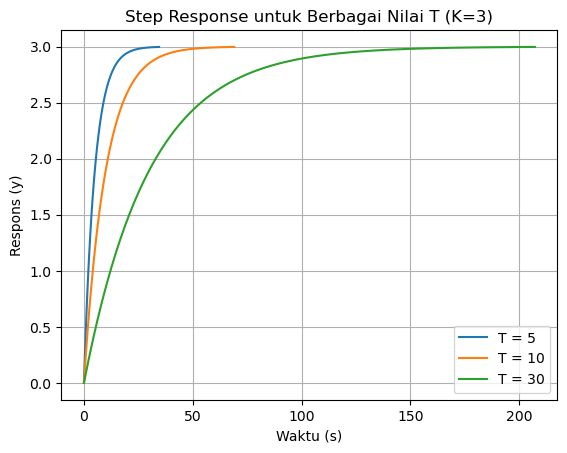

In [2]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

K = 3
T_values = [5, 10, 30]

plt.figure()
for T in T_values:
    H = ctrl.TransferFunction([K], [T, 1])
    t, y = ctrl.step_response(H)
    plt.plot(t, y, label=f"T = {T}")

plt.title("Step Response untuk Berbagai Nilai T (K=3)")
plt.xlabel("Waktu (s)")
plt.ylabel("Respons (y)")
plt.legend()
plt.grid(True)
plt.show()

Pade Approximation (N=3) dari e^(-2s):
<TransferFunction>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  -s^3 + 6 s^2 - 15 s + 15
  ------------------------
  s^3 + 6 s^2 + 15 s + 15


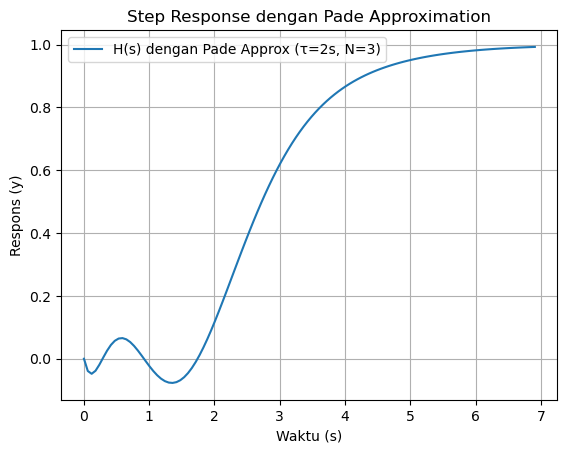

In [3]:
import control as ctrl
import matplotlib.pyplot as plt

# Pade approximation untuk delay e^(-2s)
num_delay, den_delay = ctrl.pade(2, 3)
delay_tf = ctrl.TransferFunction(num_delay, den_delay)
print("Pade Approximation (N=3) dari e^(-2s):")
print(delay_tf)

# Misal sistem utama (orde 1) H(s) = 1 / (s + 1)
H = ctrl.TransferFunction([1], [1, 1])

# Sistem total dengan delay
H_total = H * delay_tf

# Step response
t, y = ctrl.step_response(H_total)
plt.figure()
plt.plot(t, y, label="H(s) dengan Pade Approx (τ=2s, N=3)")
plt.title("Step Response dengan Pade Approximation")
plt.xlabel("Waktu (s)")
plt.ylabel("Respons (y)")
plt.legend()
plt.grid(True)
plt.show()

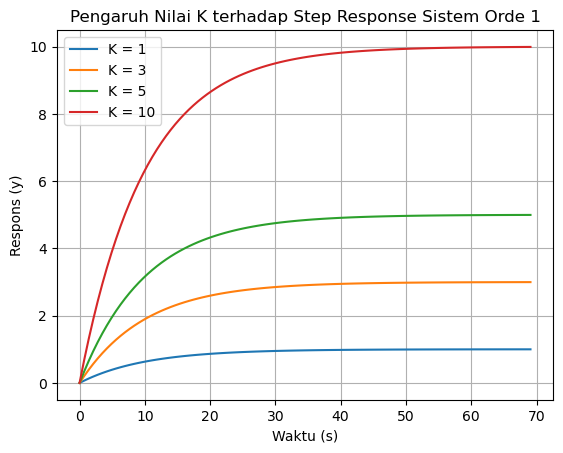

In [4]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Variasi nilai K
K_values = [1, 3, 5, 10]

# Konstanta T = 10
T = 10

# Plot semua dalam satu grafik
plt.figure()
for K in K_values:
    H = ctrl.TransferFunction([K], [T, 1])
    t, y = ctrl.step_response(H)
    plt.plot(t, y, label=f"K = {K}")

# Tambahan tampilan
plt.title("Pengaruh Nilai K terhadap Step Response Sistem Orde 1")
plt.xlabel("Waktu (s)")
plt.ylabel("Respons (y)")
plt.grid(True)
plt.legend()
plt.show()

H(s) = <TransferFunction>: sys[31]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       s + 1
  ----------------
  12 s^2 + 7 s + 1
Zeros: [-1.+0.j]
Poles: [-0.33333333+0.j -0.25      +0.j]


C:\Users\SMCID Yamin\anaconda3\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


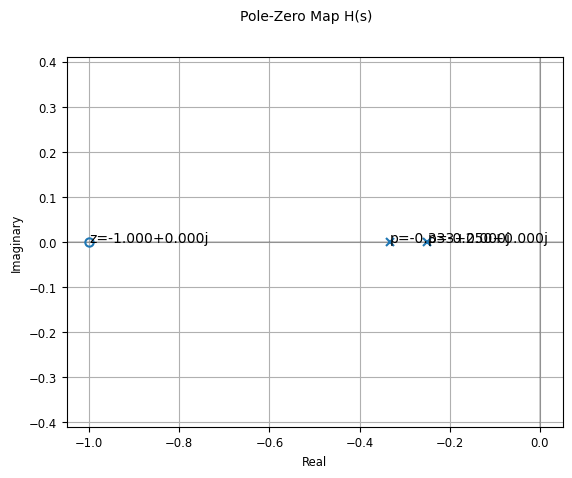

In [9]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Transfer function H(s) = (s+1)/((3s+1)(4s+1))
num = [1, 1]  # s + 1
den = np.polymul([3,1], [4,1])  # (3s+1)(4s+1) = 12s^2 + 7s + 1
H = ctrl.TransferFunction(num, den)

print("H(s) =", H)

# Poles and zeros (fungsi baru)
zeros = ctrl.zeros(H)
poles = ctrl.poles(H)
print("Zeros:", zeros)
print("Poles:", poles)

# Pole-zero map with labels
plt.figure()
ctrl.pzmap(H, plot=True, title="Pole-Zero Map H(s)")
for z in zeros:
    plt.text(z.real, z.imag, f"z={z:.3f}")
for p in poles:
    plt.text(p.real, p.imag, f"p={p:.3f}")
plt.grid(True)
plt.show()

State-space model:
 <StateSpace>: sys[32]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [ 0. -1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]


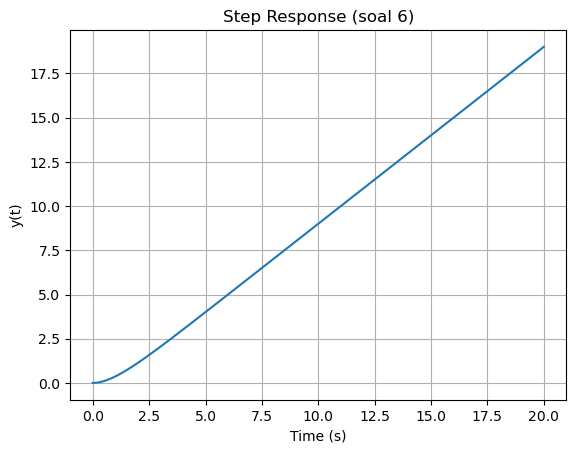

In [10]:
A = np.array([[0, 1],
              [0, -1]])
B = np.array([[0],
              [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys_ss = ctrl.ss(A, B, C, D)
print("State-space model:\n", sys_ss)

# step response
t = np.linspace(0, 20, 500)
t, y = ctrl.step_response(sys_ss, T=t)
plt.figure()
plt.plot(t, y)
plt.title("Step Response (soal 6)")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

In [11]:
eig = np.linalg.eigvals(A)
print("Eigenvalues (poles of state matrix A):", eig)
if all(e.real < 0 for e in eig):
    print("Sistem internal (A) stabil.")
else:
    print("Sistem internal (A) tidak stabil atau marginal.")

Eigenvalues (poles of state matrix A): [ 0. -1.]
Sistem internal (A) tidak stabil atau marginal.


State-space (7):
 <StateSpace>: sys[33]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-1. -3.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]


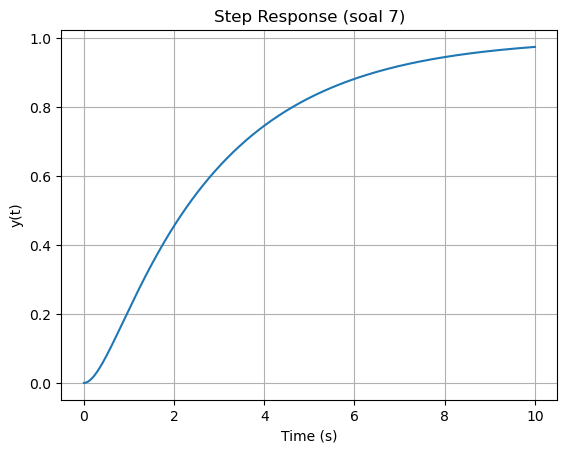

In [12]:
A = np.array([[0, 1],
              [-1, -3]])
B = np.array([[0],
              [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys7 = ctrl.ss(A, B, C, D)
print("State-space (7):\n", sys7)

# Step response
t = np.linspace(0, 10, 500)
t, y = ctrl.step_response(sys7, T=t)
plt.figure()
plt.plot(t, y)
plt.title("Step Response (soal 7)")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

Discrete system (Euler) Ad:
 [[ 1.   0.1]
 [-0.1  0.7]]
Bd:
 [[0. ]
 [0.1]]


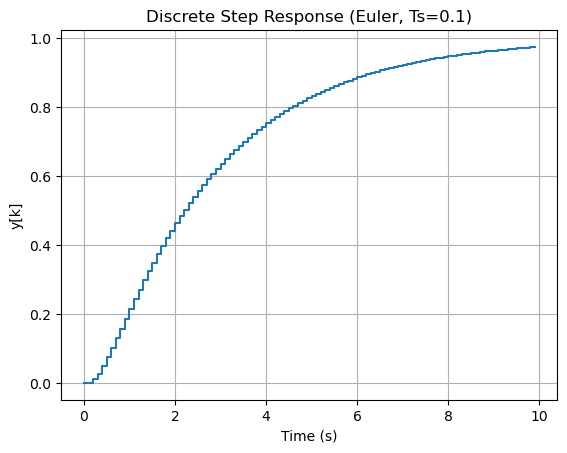

In [14]:
Ts = 0.1  # ganti jika Ts berbeda

# Forward Euler discretization: x[k+1] = (I + A*Ts) x[k] + B*Ts u[k]
Ad_euler = np.eye(A.shape[0]) + A*Ts
Bd_euler = B * Ts
Cd = C.copy()
Dd = D.copy()

sysd = ctrl.ss(Ad_euler, Bd_euler, Cd, Dd, Ts)
print("Discrete system (Euler) Ad:\n", Ad_euler)
print("Bd:\n", Bd_euler)

# Step response (discrete)
t = np.arange(0, 10, Ts)
t_out, y_out = ctrl.step_response(sysd, T=t)
plt.figure()
plt.step(t_out, y_out, where='post')
plt.title(f"Discrete Step Response (Euler, Ts={Ts})")
plt.xlabel("Time (s)")
plt.ylabel("y[k]")
plt.grid(True)
plt.show()

Transfer function (soal 9):
<TransferFunction>: sys[37]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  8.882e-16 s + 1
  ---------------
   s^2 + 3 s + 2


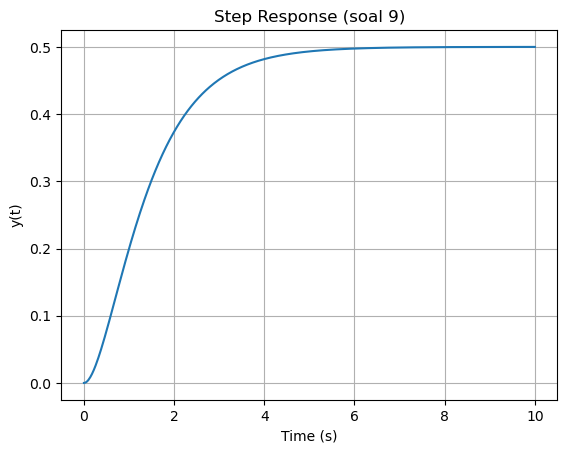

In [15]:
A9 = np.array([[0, 1],
               [-2, -3]])
B9 = np.array([[0],
               [1]])
C9 = np.array([[1, 0]])
D9 = np.array([[0]])

sys9 = ctrl.ss(A9, B9, C9, D9)
tf9 = ctrl.ss2tf(sys9)
print("Transfer function (soal 9):")
print(tf9)

t = np.linspace(0, 10, 500)
t, y = ctrl.step_response(sys9, T=t)
plt.figure()
plt.plot(t, y)
plt.title("Step Response (soal 9)")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

In [19]:
import control as ctrl
import matplotlib.pyplot as plt

# Matriks sistem
A = [[0, 1],
     [-1, -3]]
B = [[0, 0],
     [2, 4]]
C = [[1, 0]]
D = [[0, 0]]

# Konversi ke bentuk transfer function
num_matrix, den = ctrl.ss2tf(A, B, C, D)

# Ambil masing-masing TF (H1 dan H2)
H1 = ctrl.TransferFunction(num_matrix[0][0], den)  # dari input 1 ke output
H2 = ctrl.TransferFunction(num_matrix[0][1], den)  # dari input 2 ke output

print("H1(s) =", H1)
print("H2(s) =", H2)

# Step response perbandingan
t, y1 = ctrl.step_response(H1)
t, y2 = ctrl.step_response(H2)

plt.plot(t, y1, label='H1(s) - Input 1')
plt.plot(t, y2, label='H2(s) - Input 2')
plt.title('Perbandingan Step Response H1 dan H2')
plt.xlabel('Waktu (detik)')
plt.ylabel('Respon')
plt.legend()
plt.grid(True)
plt.show()

OSError: must provide indices of length 2 for transfer functions